In [2]:
!pip install statsmodels
!pip install scikit-learn

In [3]:
from pandas import read_csv
import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

In [4]:
temp_df=pd.read_csv('C:/classisificatn and regressin/daily-min-temperatures.csv' ,header=0,parse_dates=[0])

In [5]:
temp_df.head()


,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [6]:
temp_df.tail()


,Date,Temp
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7
3649,1990-12-31,13.0


In [7]:
temp_df.shape

(3650, 2)

In [8]:
temp_df.shape[0]# Get the number of rows

3650

In [9]:
#convert 80% of the data set to trained data set 
train_size=int(temp_df.shape[0]*0.8)
print(train_size)

2920


In [10]:
new_train=temp_df[0:train_size]
print(new_train)#this prints data set from the first till the 80th percent

           Date  Temp
0    1981-01-01  20.7
1    1981-01-02  17.9
2    1981-01-03  18.8
3    1981-01-04  14.6
4    1981-01-05  15.8
...         ...   ...
2915 1988-12-26   9.5
2916 1988-12-27  12.9
2917 1988-12-28  12.9
2918 1988-12-29  14.8
2919 1988-12-30  14.1

[2920 rows x 2 columns]


In [11]:
new_test=temp_df[train_size:]

In [17]:
new_test#print remaining data set from the 80th percent

,Date,Temp
2920,1989-01-01,14.3
2921,1989-01-02,17.4
2922,1989-01-03,18.5
2923,1989-01-04,16.8
2924,1989-01-05,11.5
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [13]:
new_train.shape

(2920, 2)

In [14]:
new_test.shape


(730, 2)

In [18]:
temp2_df=pd.read_csv('C:/classisificatn and regressin/daily-min-temperatures.csv' ,header=0,parse_dates=[0])

In [19]:
temp2_df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [22]:
temp2_df['t']=temp2_df['Temp'].shift(1)#here temp acts as actual value while t acts as predicted value 

In [23]:
temp2_df.head()

,Date,Temp,t
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6


In [27]:
new_train1,new_test1=temp2_df[1:temp2_df['Temp'].shape[0]-7],temp2_df[temp2_df['Temp'].shape[0]-7:]

In [28]:
new_train1.head()

,Date,Temp,t
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6
5,1981-01-06,15.8,15.8


In [29]:
train_x,train_y=new_train1['t'],new_train1['Temp']

In [30]:
test_x,test_y=new_test1['t'],new_test1['Temp']

In [31]:
new_predictions=test_x

In [32]:
print(new_predictions)

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64


In [33]:
test_y

3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64

In [36]:
new_mse=mean_squared_error(test_y,new_predictions)#to get the mse for the actual value compared to the predicted value
new_mse

3.4228571428571413

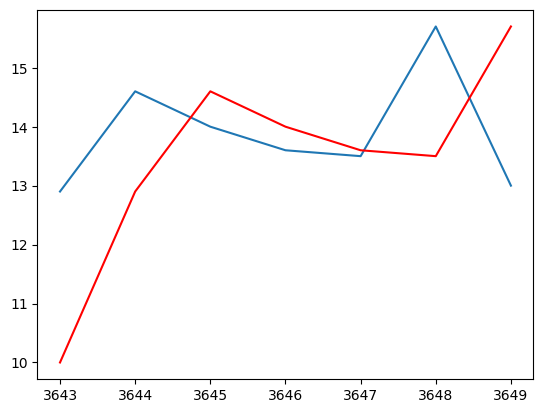

In [37]:
pyplot.plot(test_y)
pyplot.plot(new_predictions,color='red')